In [58]:
import h5py
import pandas
import numpy as np
import matplotlib.pyplot as plt

def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[0]
        return pandas.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('train')
test  = load_data('test')

In [59]:
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

In [60]:
x = train[all_variables]
y = train['Truth']

In [61]:
r = np.random
r.seed(42)

SavePlots = False
plt.close('all')

In [62]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2, f_regression
transformer = GenericUnivariateSelect(f_regression, mode = 'k_best', param=15)
FeatureSelection = transformer.fit(x, y)

/Users/shangmiao/anaconda3/envs/appml/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/Users/shangmiao/anaconda3/envs/appml/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/Users/shangmiao/anaconda3/envs/appml/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


In [63]:
feature_15 = []
mask = FeatureSelection.get_support()
for bool, feature in zip(mask, x.columns):
    if bool:
        feature_15.append(feature)

for i in range(len(feature_15)):
    feature_15[i] = str(feature_15[i]).strip('(').strip(')').strip(',').strip('\'').strip('\'')
print('The best features are:{}'.format(feature_15))

The best features are:['p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_Rhad', 'p_Rhad1', 'p_E7x7_Lr3', 'p_e2ts1', 'p_ethad', 'p_ethad1', 'p_r33over37allcalo', 'p_e2tsts1', 'p_ehad1', 'p_E5x7_Lr3', 'p_E7x11_Lr3']


In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x[feature_15], y, test_size=0.2, random_state =1)

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import time

# Normalize the input data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

start=time.time()
clf = MLPClassifier(max_iter=20000,
                    n_iter_no_change=100,           # Number of iterations without improvement before stopping
                    solver='adam',                  # Standard for minimising
                    activation='logistic',          
                    hidden_layer_sizes=(20, 20),    # Size of network 
                    learning_rate='invscaling',     
                    random_state=42)

clf.fit(x_train_scaled, y_train)

# Make predictions (NOTE: This "spits out" two columns!):
y_score_MLP = clf.predict_proba(x_test_scaled)

# Print the time usage:
end = time.time()
print(f"Time used by MLPClassifier: {(end-start)*1000:.1f} ms")

Time used by MLPClassifier: 45126.3 ms


In [66]:
data = test[feature_15]
# Use the trained model to predict probabilities
y_score_MLP_test = clf.predict_proba(data)
#print("y_score_MLP_test shape:", y_score_MLP_test.shape)

/Users/shangmiao/anaconda3/envs/appml/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'True Positive Rate')

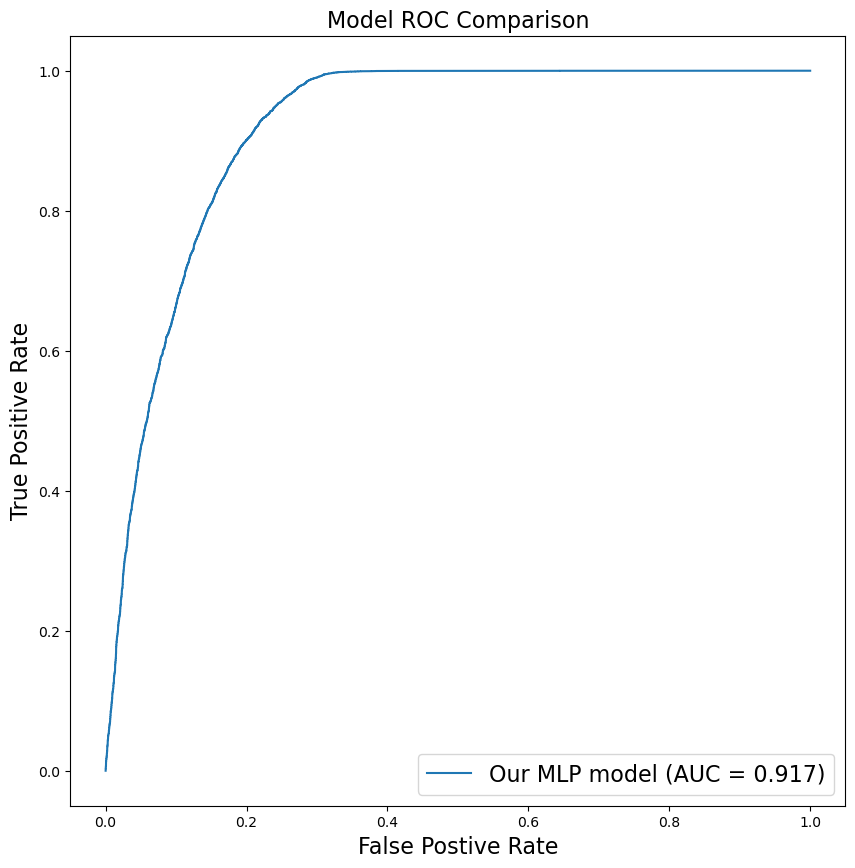

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Evaluate:
fpr, tpr, _ = roc_curve(y_test,y_score_MLP[:,1])              # False/True Positive Rate for our model
# We can now calculate the AUC scores of these ROC-curves:
auc_score = auc(fpr,tpr)                        # This is the AUC score for our model

# Let's plot the ROC curves for these results:
fig = plt.figure(figsize = [10,10])
plt.title('Model ROC Comparison', size = 16)
plt.plot(fpr, tpr, label=f'Our MLP model (AUC = {auc_score:5.3f})')
plt.legend(fontsize=16)
plt.xlabel('False Postive Rate', size=16)
plt.ylabel('True Positive Rate', size=16)

In [68]:
test_predict = pandas.DataFrame(y_score_MLP_test)
result=test_predict[1]
result.to_csv('Classification_MiaoShang_NeuralNetwork.txt', index=True, header=False)

In [69]:
file = open("Classification_MiaoShang_NeuralNetwork_VariableList.txt",'w+')
for i in range(len(feature_15)):
    file.write(str(feature_15[i])+'\n')